In [1]:
library("tidyverse")
food_data <-read_csv("/kaggle/input/food-vitamins-minerals-macronutrient/food.csv")
colnames(food_data)


colnames(food_data) = gsub("Data.", "", colnames(food_data))
colnames(food_data) = gsub("Vitamins.", "", colnames(food_data)) 
colnames(food_data) = gsub("Fat.", "", colnames(food_data)) 
colnames(food_data) = gsub("Major Minerals.", "", colnames(food_data)) 
colnames(food_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 7083 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Category, Description
dbl (36): Nutrient Data Bank Number, Data.Alpha Carotene, Data.Beta Carotene...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Category"                       "Description"                   
 [3] "Nutrient Data Bank Number"      "Data.Alpha Carotene"           
 [5] "Data.Beta Carotene"             "Data.Beta Cryptoxanthin"       
 [7] "Data.Carbohydrate"              "Data.Cholesterol"              
 [9] "Data.Choline"                   "Data.Fiber"                    
[11] "Data.Lutein and Zeaxanthin"     "Data.Lycopene"                 
[13] "Data.Niacin"                    "Data.Protein"                  
[15] "Data.Retinol"                   "Data.Riboflavin"               
[17] "Data.Selenium"                  "Data.Sugar Total"              
[19] "Data.Thiamin"                   "Data.Water"                    
[21] "Data.Fat.Monosaturated Fat"     "Data.Fat.Polysaturated Fat"    
[23] "Data.Fat.Saturated Fat"         "Data.Fat.Total Lipid"          
[25] "Data.Major Minerals.Calcium"    "Data.Major Minerals.Copper"    
[27] "Data.Major Minerals.Iron"       "Data.Major Minerals.Magnesium" 
[29] "Data.Major Minerals.Phosphorus" "Data.Major Minerals.Potassium" 
[31] "Data.Major Minerals.Sodium"     "Data.Major Minerals.Zinc"      
[33] "Data.Vitamins.Vitamin A - RAE"  "Data.Vitamins.Vitamin B12"     
[35] "Data.Vitamins.Vitamin B6"       "Data.Vitamins.Vitamin C"       
[37] "Data.Vitamins.Vitamin E"        "Data.Vitamins.Vitamin K"

[1] "Category"              "Description"           "Nutrient Bank Number" 
 [4] "Alpha Carotene"        "Beta Carotene"         "Beta Cryptoxanthin"   
 [7] "Carbohydrate"          "Cholesterol"           "Choline"              
[10] "Fiber"                 "Lutein and Zeaxanthin" "Lycopene"             
[13] "Niacin"                "Protein"               "Retinol"              
[16] "Riboflavin"            "Selenium"              "Sugar Total"          
[19] "Thiamin"               "Water"                 "Monosaturated Fat"    
[22] "Polysaturated Fat"     "Saturated Fat"         "Total Lipid"          
[25] "Calcium"               "Copper"                "Iron"                 
[28] "Magnesium"             "Phosphorus"            "Potassium"            
[31] "Sodium"                "Zinc"                  "Vitamin A - RAE"      
[34] "Vitamin B12"           "Vitamin B6"            "Vitamin C"            
[37] "Vitamin E"             "Vitamin K"

In [2]:
library("dplyr")
average_measurements <-food_data %>% 
                      group_by(Category) %>%
                      summarise(
                               across(
                               where(is.numeric), mean, na.rm = TRUE))
as_tibble(average_measurements)

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(where(is.numeric), mean, na.rm = TRUE)`.
ℹ In group 1: `Category = "100 GRAND Bar"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


Category,Nutrient Bank Number,Alpha Carotene,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,⋯,Phosphorus,Potassium,Sodium,Zinc,Vitamin A - RAE,Vitamin B12,Vitamin B6,Vitamin C,Vitamin E,Vitamin K
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100 GRAND Bar,91715300,0,3,0.0000000,70.97000,12.0,24.600000,1.00,2.0000000,⋯,86.00000,163.00000,203.000000,0.990000,38.000000,0.29000000,0.01600000,0.700000,0.42000000,6.20
3 MUSKETEERS Bar,91726420,0,0,0.0000000,77.77000,5.0,12.200000,1.50,1.0000000,⋯,69.00000,133.00000,194.000000,0.550000,20.000000,0.16000000,0.01500000,0.200000,0.98000000,2.90
3 Musketeers Truffle Crisp Bar,91726425,0,0,0.0000000,63.15000,18.0,36.600000,0.00,5.0000000,⋯,165.00000,296.00000,63.000000,1.830000,46.000000,0.60000000,0.02800000,0.000000,0.60000000,5.80
Abalone,26301137,0,0,0.3333333,11.58667,127.0,96.900000,0.20,16.3333333,⋯,240.66667,336.66667,737.666667,1.223333,7.666667,0.94666667,0.19666667,2.466667,5.95666667,36.50
Adobo,58143915,0,0,0.0000000,8.52000,73.5,58.150000,0.30,0.0000000,⋯,155.00000,208.00000,516.000000,2.465000,4.000000,0.43500000,0.23300000,0.100000,0.20500000,0.00
Agave liquid sweetener,91302020,0,94,0.0000000,76.37000,0.0,13.300000,0.20,0.0000000,⋯,1.00000,4.00000,4.000000,0.010000,8.000000,0.00000000,0.23400000,17.000000,0.98000000,22.50
Air filled fritter or fried puff,53420300,0,117,3.0000000,50.21000,126.0,89.000000,0.60,173.0000000,⋯,91.00000,73.00000,587.000000,0.590000,211.000000,0.28000000,0.06500000,0.000000,2.65000000,23.60
Alcoholic malt beverage,93106037,0,0,0.0000000,6.40000,0.0,6.133333,0.00,0.6666667,⋯,15.33333,37.66667,4.666667,0.010000,0.000000,0.01333333,0.04366667,1.766667,0.01333333,0.00
Alexander,93301010,0,7,0.0000000,18.94000,11.0,6.300000,0.00,0.0000000,⋯,34.00000,55.00000,23.000000,0.150000,31.000000,0.06000000,0.01600000,0.300000,0.08000000,0.40


In [3]:
#What foods have more sugar?
top_sugar<- average_measurements %>%
             arrange(desc(`Sugar Total`))%>% 
             select(Category,`Sugar Total`)%>%
             slice_head(n = 20)
as_tibble(top_sugar) 

Category,Sugar Total
<chr>,<dbl>
Sugar substitute and sugar blend,99.220
Sugar,97.484
Strawberry beverage powder,95.450
Pineapple candy,83.750
Honey,82.120
Fruit peel,80.680
Butterscotch hard candy,80.460
Fondant,80.160
Tamarind candy,78.570


In [4]:
#First and second result are literally sugar, we won't take them on count.
top_sugar_V2<-top_sugar%>%
              slice(-1,-2)%>%
              mutate(Category = factor(Category, levels = unique(Category)))%>%
              slice_head(n = 20)
as_tibble(top_sugar_V2)     

Category,Sugar Total
<fct>,<dbl>
Strawberry beverage powder,95.45
Pineapple candy,83.75
Honey,82.12
Fruit peel,80.68
Butterscotch hard candy,80.46
Fondant,80.16
Tamarind candy,78.57
Corn syrup,76.77
Pralines,75.85


In [5]:
colnames(top_sugar_V2) = gsub("Sugar Total", "Total Sugar", colnames(top_sugar_V2)) 
colnames(top_sugar_V2)

[1] "Category"    "Total Sugar"

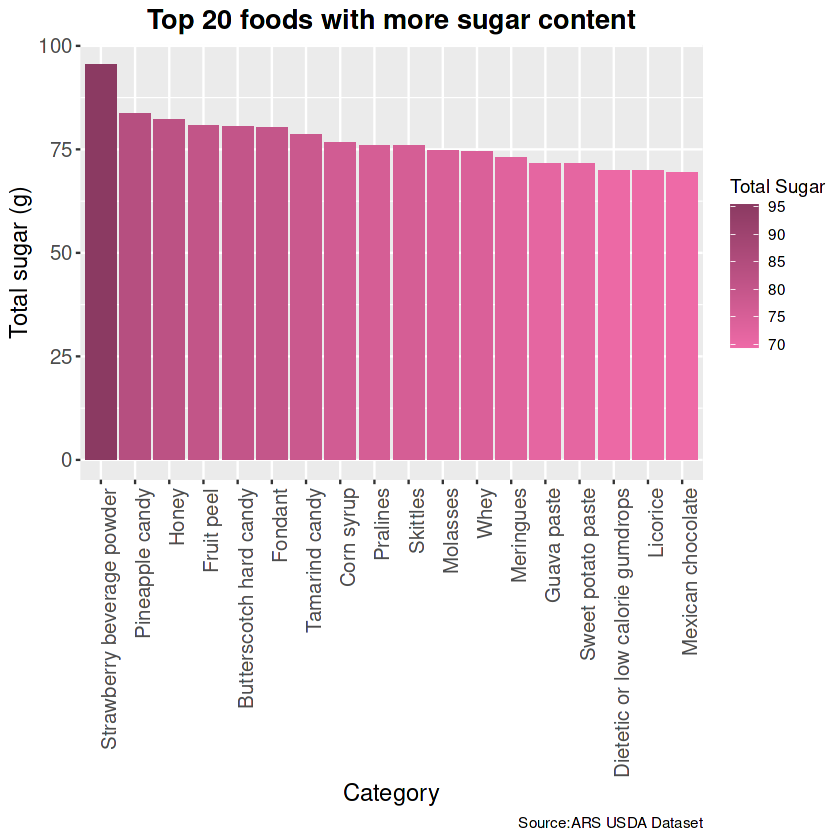

In [6]:
ggplot(
    data=top_sugar_V2)+ 
geom_col (
    mapping= aes(x=Category, y=`Total Sugar`, fill=`Total Sugar`))+ 
scale_fill_gradient(
    low = "hotpink2", 
    high = "hotpink4")+
theme(
   axis.text.x=element_text(angle=90,hjust = 1, vjust = 1,size = 12),
   axis.text.y=element_text(size = 12),
   axis.title.x = element_text(size = 14), 
   axis.title.y = element_text(size = 14),
   plot.title = element_text(hjust = 0.5, size = 16, face="bold"))+
labs(
    title= "Top 20 foods with more sugar content",
    caption= "Source:ARS USDA Dataset", 
    y= "Total sugar (g)")

Products like sugar and oils were logically listed as those with the highest content of sugar and fat, respectively, we needed the table to focus on foods typically consumed alone, rather than merely as ingredients. From the analysis of the top 20 items with the most sugar, it is evident that many are candies, such as pineapple and tamarind candy. However, we must approach this information cautiously because some items like fruit peel, whey, or sweet potato paste contain different types of sugars, such as those found in fiber or polysaccharides, which do not affect the body in the same way as monosaccharides and processed sugars.

In [7]:
#What foods have more fats?
top_lipids<- average_measurements %>%
             arrange(desc(`Total Lipid`))%>% 
             select(Category,`Total Lipid`)%>%
             slice_head(n = 20)
as_tibble(top_lipids)

Category,Total Lipid
<chr>,<dbl>
Almond oil,100.00
Canola oil,100.00
Corn oil,100.00
Cottonseed oil,100.00
Industrial oil as ingredient in food,100.00
Lard,100.00
Olive oil,100.00
Peanut oil,100.00
Safflower oil,100.00


In [8]:
#Discarding actual oils used as ingredients.
top_lipids_V2<- average_measurements %>% 
                arrange(desc(`Total Lipid`))%>% 
                select(Category,`Total Lipid`)%>%
                mutate(Category = factor(Category, levels = unique(Category)))%>%
                slice(-(1:21))%>%
                slice_head(n = 20)
as_tibble(top_lipids_V2)

Category,Total Lipid
<fct>,<dbl>
Fat back,81.9300
Salt pork,81.9300
Macadamia nuts,76.0800
Table fat,74.6800
Butter,73.9050
Butter-oil blend,73.2025
Garlic sauce,73.0500
Lemon-butter sauce,73.0200
Pecans,69.4540


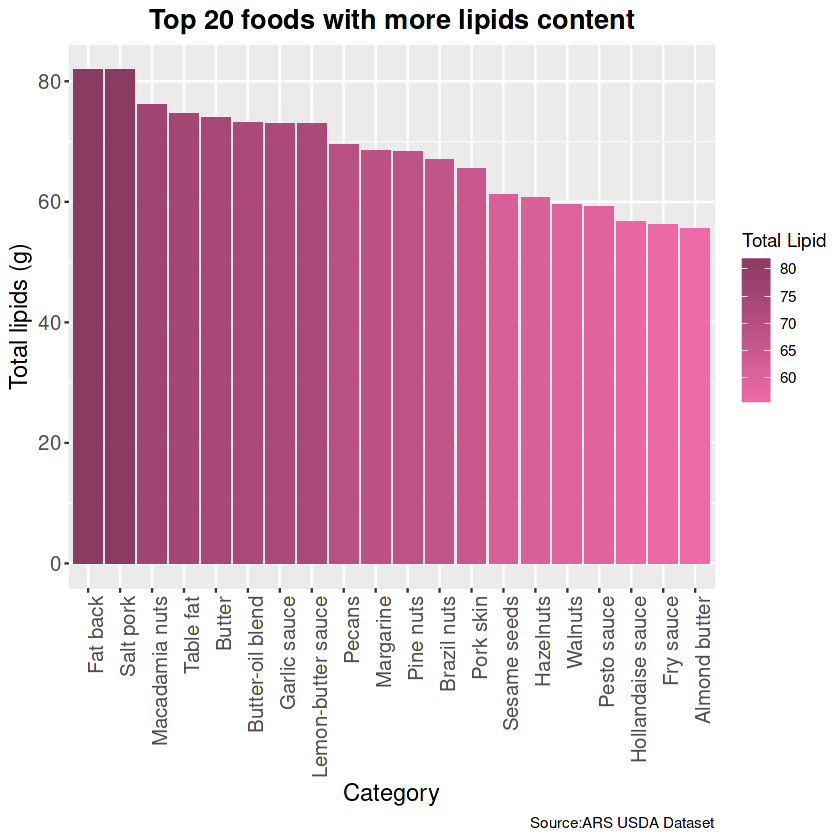

In [9]:
ggplot(
    data=top_lipids_V2)+ 
geom_col (
    mapping= aes(x=Category, y=`Total Lipid`, fill=`Total Lipid`))+ 
scale_fill_gradient(
    low = "hotpink2", 
    high = "hotpink4")+
theme(
   axis.text.x=element_text(angle=90,hjust = 1, vjust = 1,size = 12),
   axis.text.y=element_text(size = 12),
   axis.title.x = element_text(size = 14), 
   axis.title.y = element_text(size = 14),
   plot.title = element_text(hjust = 0.5, size = 16, face="bold"))+
labs(
    title= "Top 20 foods with more lipids content",
    caption= "Source:ARS USDA Dataset", 
    y= "Total lipids (g)")

In [10]:
top_lipids_V3<- average_measurements %>% 
                arrange(desc(`Total Lipid`))%>% 
                select(Category,`Total Lipid`, `Saturated Fat`,
                        `Monosaturated Fat`, `Polysaturated Fat` )%>%
                mutate(Category = factor(Category, levels = unique(Category)))%>%
                slice(-(1:21))%>%
                slice_head(n = 20)
as_tibble(top_lipids_V3)

Category,Total Lipid,Saturated Fat,Monosaturated Fat,Polysaturated Fat
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Fat back,81.9300,31.33900,36.64000,10.74400
Salt pork,81.9300,31.33900,36.64000,10.74400
Macadamia nuts,76.0800,11.94700,59.27500,1.49800
Table fat,74.6800,35.96600,22.30500,12.19900
Butter,73.9050,45.61175,19.46075,2.86575
Butter-oil blend,73.2025,44.11725,19.17400,2.93775
Garlic sauce,73.0500,46.24000,18.92000,2.76400
Lemon-butter sauce,73.0200,46.23500,18.92000,2.74100
Pecans,69.4540,6.12420,38.89620,21.20800


In [11]:
top_lipids_V3_long <- top_lipids_V3 %>%
                      pivot_longer(
                          cols = c(`Saturated Fat`,`Monosaturated Fat`, `Polysaturated Fat`),
                          names_to = "Fat_Type",
                          values_to = "Fat_Value")
as_tibble(top_lipids_V3_long)

Category,Total Lipid,Fat_Type,Fat_Value
<fct>,<dbl>,<chr>,<dbl>
Fat back,81.9300,Saturated Fat,31.33900
Fat back,81.9300,Monosaturated Fat,36.64000
Fat back,81.9300,Polysaturated Fat,10.74400
Salt pork,81.9300,Saturated Fat,31.33900
Salt pork,81.9300,Monosaturated Fat,36.64000
Salt pork,81.9300,Polysaturated Fat,10.74400
Macadamia nuts,76.0800,Saturated Fat,11.94700
Macadamia nuts,76.0800,Monosaturated Fat,59.27500
Macadamia nuts,76.0800,Polysaturated Fat,1.49800


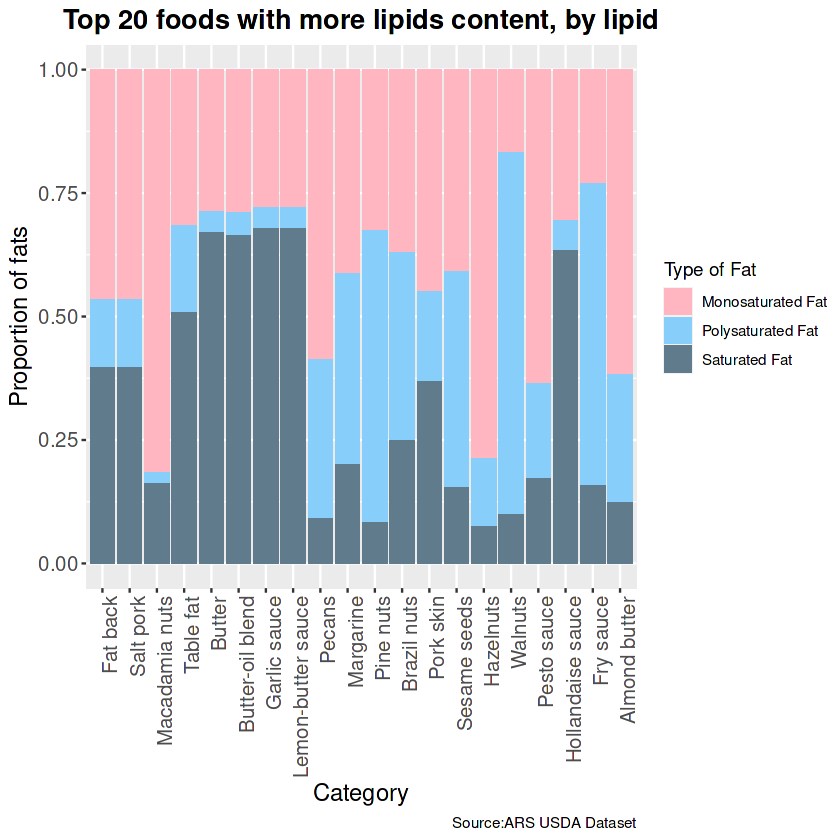

In [12]:
ggplot(
    data=top_lipids_V3_long, 
    aes(x = Category, y = Fat_Value, fill = Fat_Type))+ 
geom_col (position = "fill")+
scale_fill_manual(
    values = c("Monosaturated Fat" = "lightpink", "Polysaturated Fat" = "lightskyblue",
               "Saturated Fat" = "lightskyblue4"))+
theme(
   axis.text.x=element_text(angle=90,hjust = 1, vjust = 1,size = 12),
   axis.text.y=element_text(size = 12),
   axis.title.x = element_text(size = 14), 
   axis.title.y = element_text(size = 14),
   plot.title = element_text(hjust = 0.5, size = 16, face="bold"))+
labs(
    title= "Top 20 foods with more lipids content, by lipid",
    caption= "Source:ARS USDA Dataset", 
    y = "Proportion of fats",
    x = "Category",
    fill = "Type of Fat")

In [13]:
###What foods have more vitamins?
top_vitamins<- average_measurements %>% 
               arrange(desc(`Vitamin B12`))%>% 
               select(Category,`Vitamin B12`, `Vitamin K`, `Thiamin`,
                      `Vitamin B6`, Riboflavin, Niacin,`Vitamin C`,
                      `Vitamin A - RAE`, `Vitamin E`)%>%
               slice_head(n = 20)
as_tibble(top_vitamins)

Category,Vitamin B12,Vitamin K,Thiamin,Vitamin B6,Riboflavin,Niacin,Vitamin C,Vitamin A - RAE,Vitamin E
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Beef liver,76.21500,3.6000000,0.18400000,1.01350000,3.39600000,17.3540000,1.3000000,8521.00000,0.4850000
Liver,50.67000,3.3000000,0.12400000,0.67500000,2.09600000,10.7130000,2.4000000,4727.00000,0.3600000
Liver dumpling,45.89000,40.6000000,0.21100000,0.71000000,2.35000000,12.1000000,2.7000000,6255.00000,1.6700000
Octopus,36.66800,2.5200000,0.07840000,0.69800000,0.08900000,4.1670000,8.9800000,88.40000,2.3160000
Stewed variety meats,27.45000,4.8000000,0.10600000,0.49100000,1.36900000,7.4420000,21.1000000,3670.00000,0.4600000
Kidney,24.69000,0.0000000,0.15900000,0.38800000,2.94500000,3.8870000,0.0000000,0.00000,0.0800000
Cereal (Kellogg's All-Bran Complete Wheat Flakes),21.00000,1.4000000,5.17000000,6.90000000,5.86000000,69.0000000,207.0000000,776.00000,46.3500000
Liverwurst,20.09000,1.6000000,0.24900000,0.33000000,1.52500000,8.3680000,0.0000000,4220.00000,0.3500000
Cereal (Kellogg's Special K),19.40000,0.1000000,1.69000000,6.44000000,1.91000000,22.6000000,68.0000000,500.00000,15.3000000


In [14]:
top_vitamins <- top_vitamins%>%
                mutate(total_vitamins = rowSums(across(c(
                                          `Vitamin B12`, `Vitamin K`,`Thiamin`,`Vitamin B6`, 
                                           Riboflavin, Niacin,`Vitamin C`, `Vitamin A - RAE`, 
                                           `Vitamin E`)), na.rm = TRUE)) %>%
               arrange(desc(total_vitamins))
as_tibble(top_vitamins)

Category,Vitamin B12,Vitamin K,Thiamin,Vitamin B6,Riboflavin,Niacin,Vitamin C,Vitamin A - RAE,Vitamin E,total_vitamins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Beef liver,76.21500,3.6000000,0.18400000,1.01350000,3.39600000,17.3540000,1.3000000,8521.00000,0.4850000,8624.54750
Liver dumpling,45.89000,40.6000000,0.21100000,0.71000000,2.35000000,12.1000000,2.7000000,6255.00000,1.6700000,6361.23100
Liver,50.67000,3.3000000,0.12400000,0.67500000,2.09600000,10.7130000,2.4000000,4727.00000,0.3600000,4797.33800
Liverwurst,20.09000,1.6000000,0.24900000,0.33000000,1.52500000,8.3680000,0.0000000,4220.00000,0.3500000,4252.51200
Stewed variety meats,27.45000,4.8000000,0.10600000,0.49100000,1.36900000,7.4420000,21.1000000,3670.00000,0.4600000,3733.21800
Chicken liver,15.89000,0.8500000,0.28750000,0.66650000,1.91350000,10.0920000,22.0000000,3378.50000,0.9000000,3431.09950
Cereal (Kellogg's All-Bran Complete Wheat Flakes),21.00000,1.4000000,5.17000000,6.90000000,5.86000000,69.0000000,207.0000000,776.00000,46.3500000,1138.68000
Cereal (Kellogg's Smart Start Strong),12.00000,1.1000000,3.00000000,4.00000000,3.40000000,40.0000000,30.0000000,688.00000,27.0000000,808.50000
Cereal (Kellogg's Special K),19.40000,0.1000000,1.69000000,6.44000000,1.91000000,22.6000000,68.0000000,500.00000,15.3000000,635.44000


In [15]:
top_vitamins_long <- top_vitamins %>%
                     pivot_longer(cols = c(`Vitamin B12`, `Vitamin K`,`Thiamin`,`Vitamin B6`, 
                                          Riboflavin, Niacin,`Vitamin C`, `Vitamin A - RAE`, 
                                          `Vitamin E`),
                                  names_to = "Vitamin_Type",
                                  values_to = "Vitamin_value")
as_tibble(top_vitamins_long)

Category,total_vitamins,Vitamin_Type,Vitamin_value
<chr>,<dbl>,<chr>,<dbl>
Beef liver,8624.548,Vitamin B12,76.2150
Beef liver,8624.548,Vitamin K,3.6000
Beef liver,8624.548,Thiamin,0.1840
Beef liver,8624.548,Vitamin B6,1.0135
Beef liver,8624.548,Riboflavin,3.3960
Beef liver,8624.548,Niacin,17.3540
Beef liver,8624.548,Vitamin C,1.3000
Beef liver,8624.548,Vitamin A - RAE,8521.0000
Beef liver,8624.548,Vitamin E,0.4850


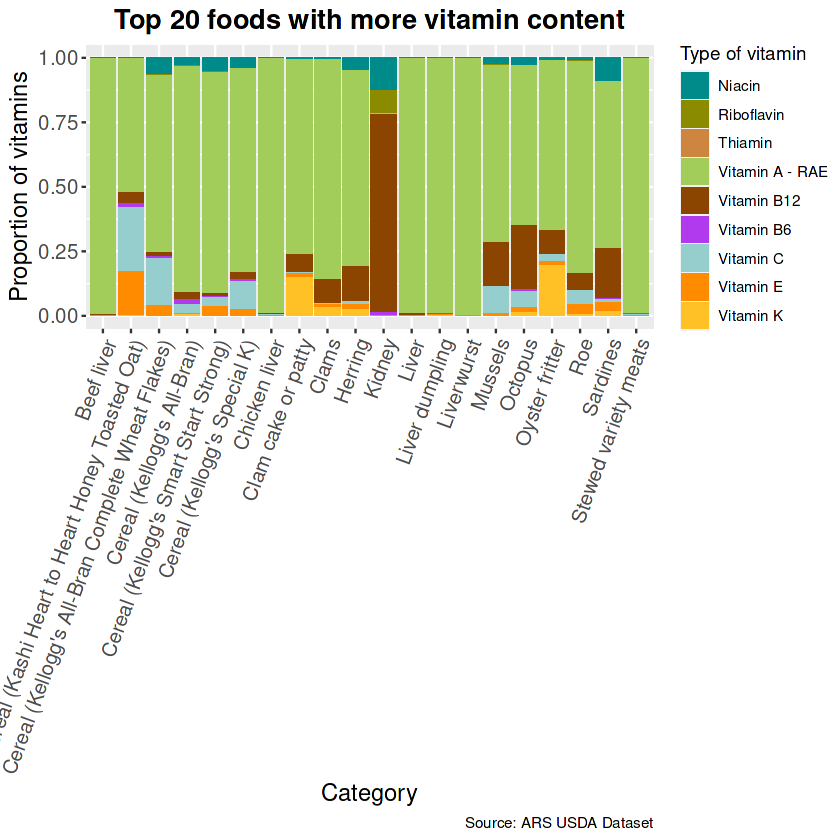

In [16]:
ggplot(
    top_vitamins_long, 
    aes(x = Category, y = Vitamin_value, fill = Vitamin_Type)) +
geom_col(position = "fill") + 
scale_fill_manual(values = c(
    "Vitamin B12" = "darkorange4", 
    "Vitamin K" = "goldenrod1",
    "Thiamin" = "tan3",
    "Vitamin B6" = "darkorchid2",
    "Riboflavin" = "yellow4",
    "Niacin" = "cyan4",
    "Vitamin C" = "paleturquoise3",
    "Vitamin A - RAE" = "darkolivegreen3",
    "Vitamin E" = "darkorange" )) +
  theme(
      axis.text.x = element_text(angle = 70, hjust = 1, vjust = 1,size = 12),
      axis.text.y=element_text(size = 12),
      axis.title.x = element_text(size = 14), 
      axis.title.y = element_text(size = 14),
      plot.title = element_text(hjust = 0.5, size = 16, face="bold"))+
  labs(
    title = "Top 20 foods with more vitamin content",
    caption = "Source: ARS USDA Dataset",
    y = "Proportion of vitamins",
    x = "Category",
    fill = "Type of vitamin")

A rich vitamins food is not always a totally health one, so we compared the contents of food with more vitamins versus its fat and sugar content, so people get nuanced approach highlights and understands the complexity of nutritional data and underscores the importance of detailed and context-aware analysis.

In [17]:
top_vitamins_sugarfat <- average_measurements %>%
                   mutate(total_vitamins = rowSums(across(c(`Vitamin B12`, `Vitamin K`, `Thiamin`, `Vitamin B6`, 
                                      Riboflavin, Niacin, `Vitamin C`, `Vitamin A - RAE`, 
                                      `Vitamin E`)), na.rm = TRUE),  
                            Sugar_category = cut(`Sugar Total`, 
                                     breaks = c(0, 20, 30, Inf), 
                                     labels = c("0-20 g", "21-30 g", "31+ g"),
                                      right = FALSE),
                           Fat_category = cut(`Polysaturated Fat`, 
                                 breaks = c(0,3, 5, 10, Inf), 
                                 labels = c("0-2","3-5 g", "6-10 g", "11+ g"),
                                  right = FALSE) ) %>%
                    arrange(desc(total_vitamins)) %>%
                    select(Category, total_vitamins,  `Sugar Total`, Sugar_category,
                          `Polysaturated Fat`, Fat_category) %>%
                    slice_head(n = 20)
as_tibble (top_vitamins_sugarfat)

Category,total_vitamins,Sugar Total,Sugar_category,Polysaturated Fat,Fat_category
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
Beef liver,8624.548,0.000,0-20 g,1.056,0-2
Liver dumpling,6361.231,0.910,0-20 g,4.247,3-5 g
Liver,4797.338,1.780,0-20 g,0.853,0-2
Liverwurst,4252.512,0.000,0-20 g,3.193,3-5 g
Stewed variety meats,3733.218,1.940,0-20 g,0.513,0-2
Chicken liver,3431.099,0.010,0-20 g,2.178,0-2
Parsley,2196.337,0.850,0-20 g,0.124,0-2
Livers,1769.605,1.230,0-20 g,3.840,3-5 g
Nutrition bar (Balance Original Bar),1528.797,34.890,31+ g,1.969,0-2


In [18]:
top_vitamins_sugarfat <- top_vitamins_sugarfat %>%
                         group_by(Fat_category) %>%
                         filter(n() > 0) %>%
                         ungroup()
top_vitamins_sugarfat


Category,total_vitamins,Sugar Total,Sugar_category,Polysaturated Fat,Fat_category
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
Beef liver,8624.548,0.000,0-20 g,1.056,0-2
Liver dumpling,6361.231,0.910,0-20 g,4.247,3-5 g
Liver,4797.338,1.780,0-20 g,0.853,0-2
Liverwurst,4252.512,0.000,0-20 g,3.193,3-5 g
Stewed variety meats,3733.218,1.940,0-20 g,0.513,0-2
Chicken liver,3431.099,0.010,0-20 g,2.178,0-2
Parsley,2196.337,0.850,0-20 g,0.124,0-2
Livers,1769.605,1.230,0-20 g,3.840,3-5 g
Nutrition bar (Balance Original Bar),1528.797,34.890,31+ g,1.969,0-2


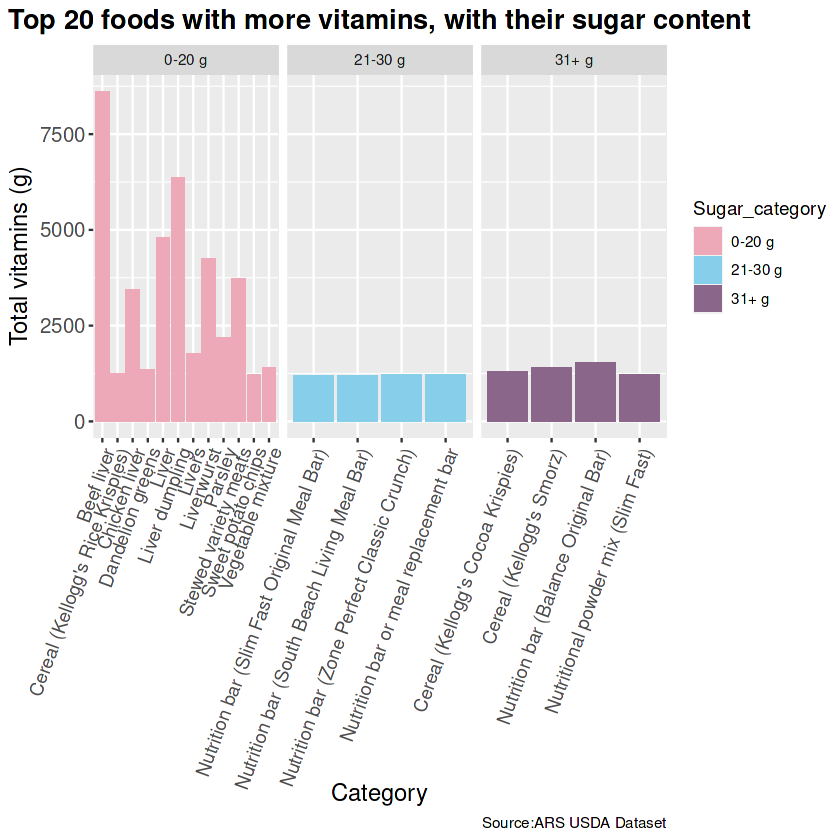

In [19]:
ggplot(
    data=top_vitamins_sugarfat)+ 
scale_fill_manual(values = c(
    "0-20 g" = "pink2", 
    "21-30 g" = "skyblue",
    "31+ g" = "plum4"
    )) +
geom_col (mapping=aes(x=Category, y=total_vitamins,fill=Sugar_category))+
theme(
    axis.text.x = element_text(angle = 70, hjust = 1, vjust = 1,size = 11),
    axis.text.y=element_text(size = 12),
    axis.title.x = element_text(size = 14), 
    axis.title.y = element_text(size = 14),
    plot.title = element_text(hjust = 0.5, size = 16, face="bold"))+

labs(
title= "Top 20 foods with more vitamins, with their sugar content",
caption= "Source:ARS USDA Dataset", y= "Total vitamins (g)")+
facet_wrap(~Sugar_category, scales = "free_x")

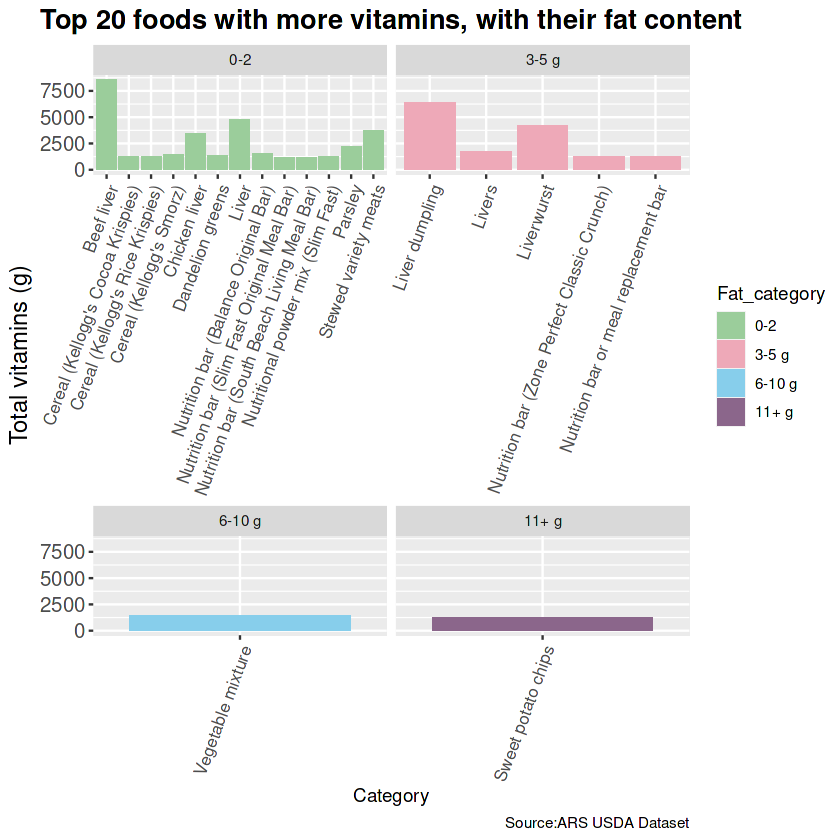

In [20]:
ggplot(
    data=top_vitamins_sugarfat)+ 
scale_fill_manual(values = c( 
    "0-2"= "darkseagreen3",
    "3-5 g"= "pink2",
    "6-10 g"= "skyblue",
    "11+ g"= "plum4"
    ))+
geom_col(mapping=aes(x=Category, y=total_vitamins,fill=Fat_category))+
theme(
    axis.text.x = element_text(angle = 70, hjust = 1, vjust = 1,size = 10),
    axis.text.y=element_text(size = 12),
    axis.title.x = element_text(size = 11), 
    axis.title.y = element_text(size = 14),
    plot.title = element_text(hjust = 0.5, size = 16, face="bold"))+

labs(
title= "Top 20 foods with more vitamins, with their fat content",
caption= "Source:ARS USDA Dataset", y= "Total vitamins (g)")+
facet_wrap(~Fat_category, scales = "free_x")